In [121]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sns

In [122]:
# Find out the principle components for the iris dataset for feature selection

In [123]:
iris = datasets.load_iris()
list(iris)

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [124]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [125]:
data_scaled = pd.DataFrame(scale(df),columns = df.columns) # normalization

In [126]:
data_scaled.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [127]:
pca = PCA(n_components=4)

In [128]:
x_pca = pca.fit_transform(data_scaled)

In [129]:
var = pca.explained_variance_ratio_
print var

[0.72770452 0.23030523 0.03683832 0.00515193]


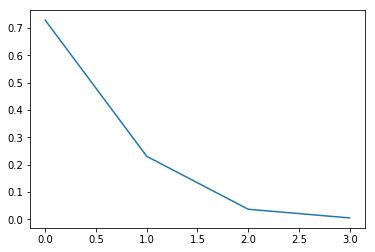

In [130]:
plt.plot(var)

In [131]:
# Cumulative variance explains
var1 = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

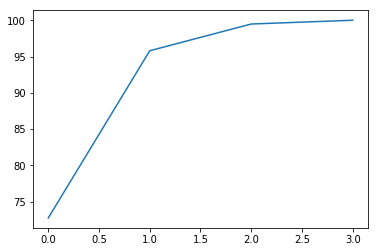

In [132]:
plt.plot(var1)

In [133]:
#pca.columns = ['PC1','PC2','PC3','PC4']
print pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC1','PC2','PC3','PC4'])

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC1           0.522372         -0.263355           0.581254          0.565611
PC2           0.372318          0.925556           0.021095          0.065416
PC3          -0.721017          0.242033           0.140892          0.633801
PC4          -0.261996          0.124135           0.801154         -0.523546


In [134]:
# The PCA sign does not affect its interpretation since the sign does not affect the variance contained in each component.
# In this case, sepal width and PC-2 are strongly correlated (inversely) since the correlation coef is -0.92. 
# On the other hand, petal length and PC-2 are not correlated at all since corr coef is -0.02. 
# So, PC-2 grows as sepal width decreases and PC-2 is independent of changes in petal length. 
# That is, for PC-2 sepal width is important while petal length is not. 

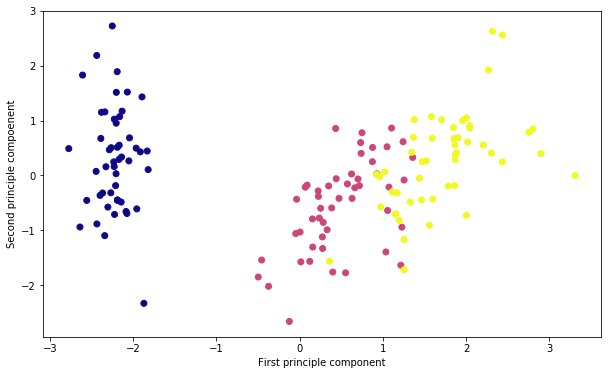

In [135]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c = iris.target[:], cmap = 'plasma')
plt.xlabel('First principle component')
plt.ylabel('Second principle compoenent')

plt.show()